In [84]:
import numpy as np
import pandas as pd
import tables

In [85]:
INPUT_DIR = '../input/m5-forecasting-accuracy/'
OUTPUT_DIR =  '../input/lv1/'

In [86]:
price_df = pd.read_csv(INPUT_DIR+'sell_prices.csv')
cal_df = pd.read_csv(INPUT_DIR+'calendar.csv')

In [76]:
p_df = pd.merge(price_df, cal_df.loc[:,['wm_yr_wk', 'd']], on='wm_yr_wk')

In [77]:
sum_df = p_df.groupby(["d"])["sell_price"].agg(['count', 'sum'])

In [78]:
price_fea = pd.merge(cal_df.loc[:,['d']],sum_df, on='d').T

In [81]:
price_fea = price_fea.reset_index()

In [82]:
price_fea.to_csv(OUTPUT_DIR+'price_fea.csv',index=False)

In [83]:
price_fea

,index,0,1,2,3,4,5,6,7,8,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,d,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
1,count,10932,10932,10932,10932,10932,10932,10932,11975,11975,...,30490,30490,30490,30490,30490,30490,30490,30490,30490,30490
2,sum,44506.9,44506.9,44506.9,44506.9,44506.9,44506.9,44506.9,49834.9,49834.9,...,136654,136674,136674,136674,136674,136674,136674,136674,136655,136655


In [ ]:
# sales feature

In [87]:
sales = pd.read_csv(INPUT_DIR+'sales_train_evaluation.csv')

In [88]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [101]:
import matplotlib.pyplot as plt

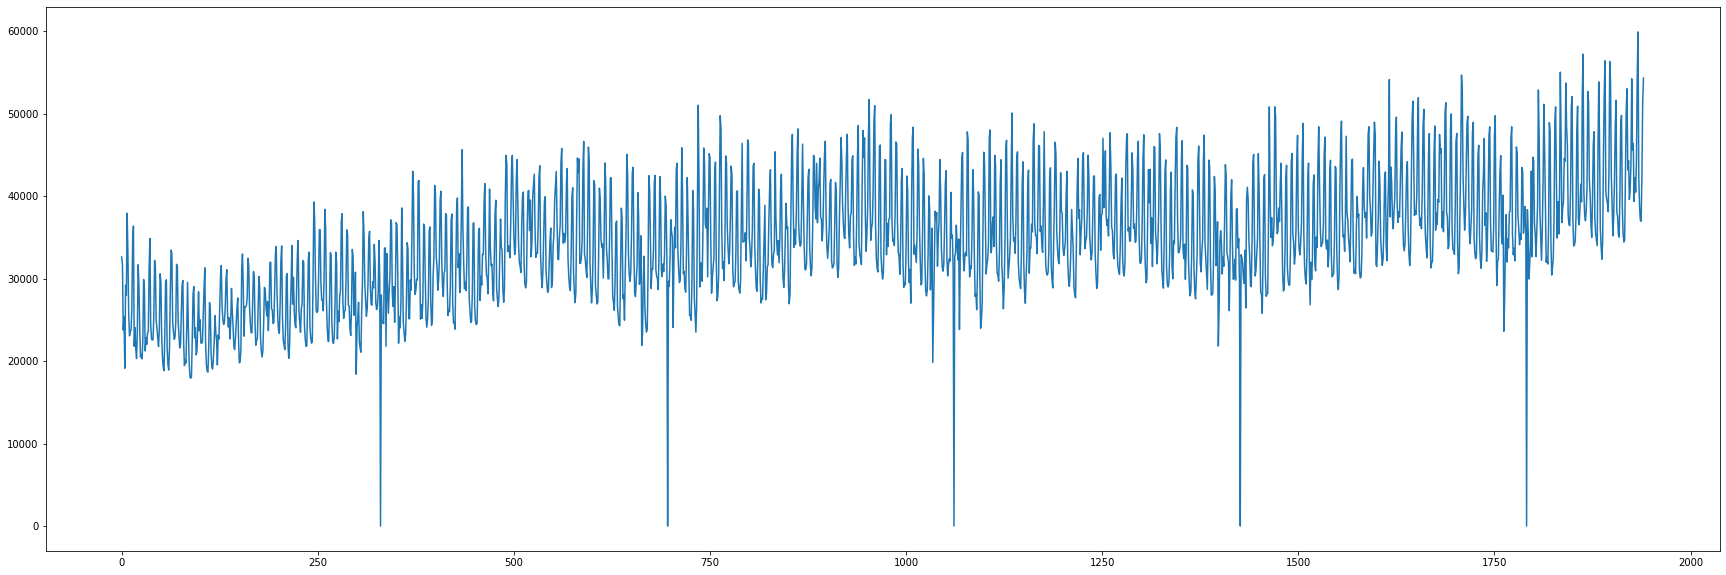

In [102]:
f, ax = plt.subplots(figsize=(30, 10))
plt.plot(np.array(sales.iloc[:,6:]).sum(axis=0))

In [111]:
sum_sales_1shift = np.array(sales.iloc[:,6:-1]).sum(axis=0)

In [110]:
sum_sales = np.array(sales.iloc[:,7:]).sum(axis=0)

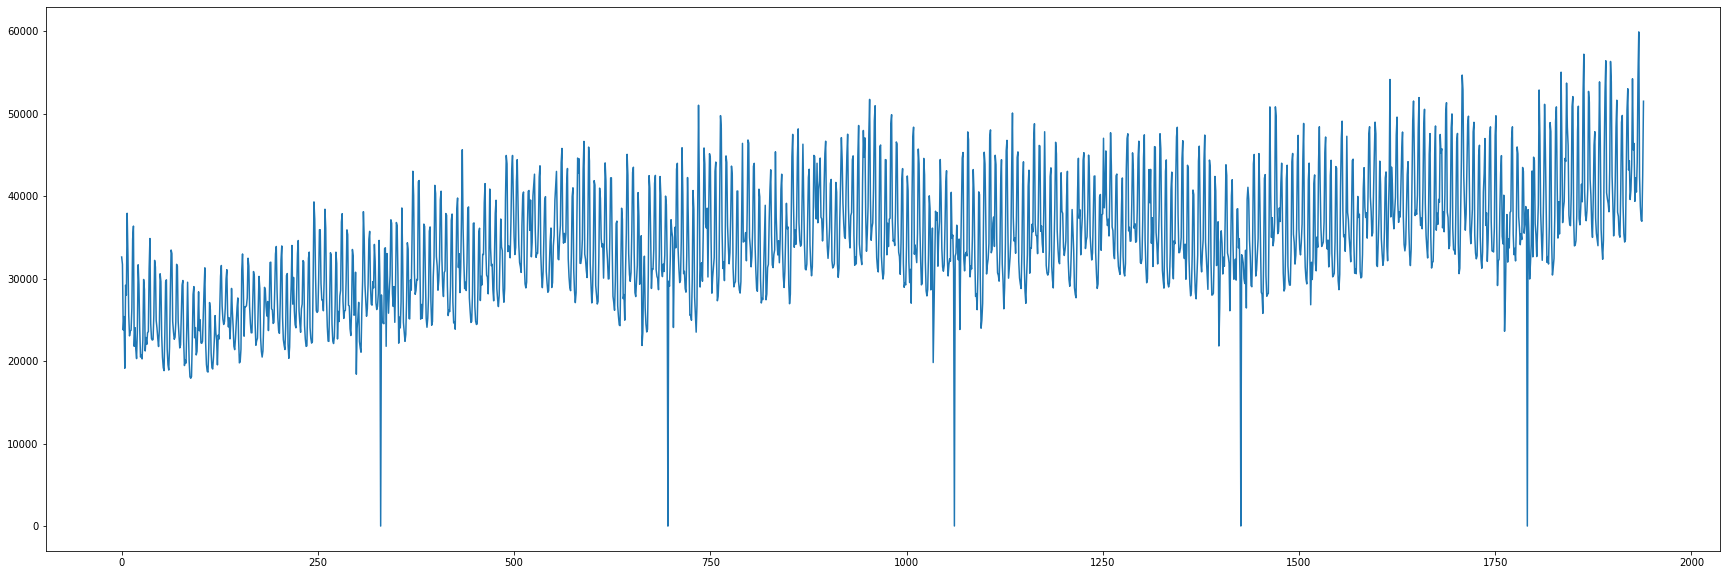

In [113]:
f, ax = plt.subplots(figsize=(30, 10))
plt.plot(sum_sales_1shift)

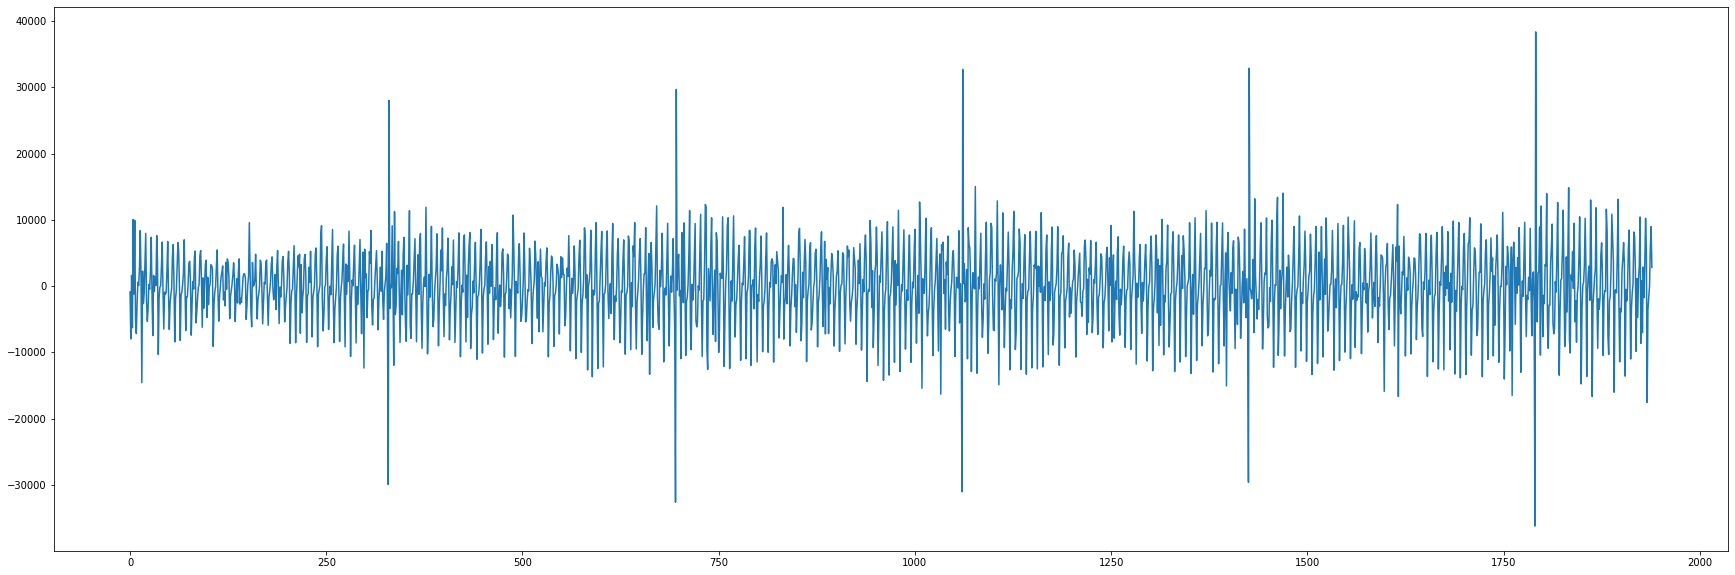

In [118]:
f, ax = plt.subplots(figsize=(30, 10))
diff_1 = sum_sales - sum_sales_1shift
plt.plot(diff_1)

In [119]:
diff_1.shape

(1940,)

In [123]:
diff_1_diff_1 = diff_1[1:] - diff_1[:-1]

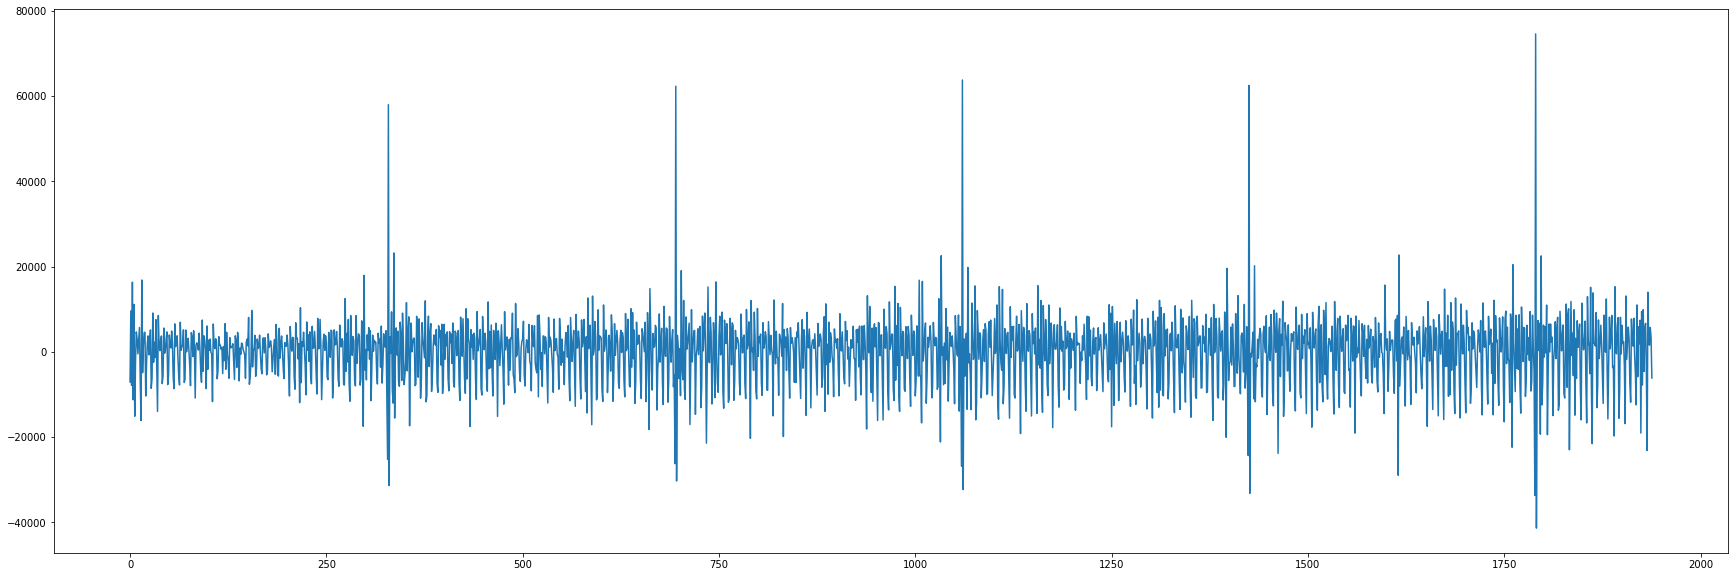

In [129]:
f, ax = plt.subplots(figsize=(30, 10))
plt.plot(diff_1_diff_1)

In [126]:
diff_1_diff_1.shape

(1939,)